In [0]:
# You need this in colab to avoid statsmodels-scipy incompatibility
# !pip install --upgrade git+https://github.com/statsmodels/statsmodels
# Remember to restart kernel after this

In [0]:
# Downgrading scipy is faster than upgrading statsmodels above
!pip install --user scipy==1.2
# Remember to restart kernel after this

# Data analysis using Pandas!
![Data analysis using Pandas!](https://nationalzoo.si.edu/sites/default/files/styles/1400x700_scale_and_crop/public/animals/giantpanda-003.jpg?itok=bqwa0Y6t&timestamp=1520537552)


# The lazy way
- Just learning basic Python can take a week.
- Learning to program in Python can take a year.
- An intelligent hacker with 10+ years' experience in C/C++ could not write half-decent code in Python even after several years. 


This is how I use R
  - Look up a function and use it.
  - Do not bother learning R syntax beyond what I need to get my work done. 
  



To do data analysis you do not need to worry (much) about Python syntax, but find the libraries and functions you will need.
- You will learn as you go.


## Collecting our tools

In [0]:
import requests
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as smapi
import sklearn

## Collecting our raw  materials 

In [0]:
data_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
attr_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.names'

In [0]:
attrs_data = requests.get(attr_url)

In [0]:
attrs = attrs_data.content.decode('utf-8')

### Take a look at what we have
 Skim through it, pay attention to 5-8

In [0]:
print(attrs)

Citation Request:
   This breast cancer databases was obtained from the University of Wisconsin
   Hospitals, Madison from Dr. William H. Wolberg.  If you publish results
   when using this database, then please include this information in your
   acknowledgements.  Also, please cite one or more of:

   1. O. L. Mangasarian and W. H. Wolberg: "Cancer diagnosis via linear 
      programming", SIAM News, Volume 23, Number 5, September 1990, pp 1 & 18.

   2. William H. Wolberg and O.L. Mangasarian: "Multisurface method of 
      pattern separation for medical diagnosis applied to breast cytology", 
      Proceedings of the National Academy of Sciences, U.S.A., Volume 87, 
      December 1990, pp 9193-9196.

   3. O. L. Mangasarian, R. Setiono, and W.H. Wolberg: "Pattern recognition 
      via linear programming: Theory and application to medical diagnosis", 
      in: "Large-scale numerical optimization", Thomas F. Coleman and Yuying
      Li, editors, SIAM Publications, Philadelphia 199

# Pause here: Let us discuss the data.
  - How many entries do we expect?
  - How many columns do we expect?
  - What is "domain"?
  - Is there any data missing? How can we find them?
  - What is special about the last attribute?
  

Let us name the columns:

In [0]:
cols = ['sample', 'clump_thickness', 'size_uniformity',
        'shape_uniformity', 'adhesion', 'cell_size', 
        'bare_nuclei', 'bland_chromatin', 'normal_nuclei', 
        'mitoses', 'malignant']

- `left = right_hand_side` is how you assign a variable in Python.
- Each quoted word on the RHS is a string. You can use single or double quotes for strings. 
- The whole RHS thing is called a `list`.


Pandas can read from a URL (older versions could not) into a `DataFrame`.

In [0]:
data = pd.read_csv(data_url, names=cols)
# data = pd.read_csv(data_url, names=cols, na_values='?')

We can make `head` or `tail` of the data!

In [0]:
data.head()

,sample,clump_thickness,size_uniformity,shape_uniformity,adhesion,cell_size,bare_nuclei,bland_chromatin,normal_nuclei,mitoses,malignant
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [0]:
data.tail()

,sample,clump_thickness,size_uniformity,shape_uniformity,adhesion,cell_size,bare_nuclei,bland_chromatin,normal_nuclei,mitoses,malignant
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4
698,897471,4,8,8,5,4,5,10,4,1,4


In [0]:
len(data[data.malignant == 4])

0

If that is not good enough, ask Pandas to describe the data!

In [0]:
data.describe()

,sample,clump_thickness,size_uniformity,shape_uniformity,adhesion,cell_size,bland_chromatin,normal_nuclei,mitoses,malignant
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


We don't want the sample code number in our statistics.

In [0]:
data.set_index('sample', inplace=True)

In [0]:
data.head()

,clump_thickness,size_uniformity,shape_uniformity,adhesion,cell_size,bare_nuclei,bland_chromatin,normal_nuclei,mitoses,malignant
sample,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


Some people like pictures more than numbers!

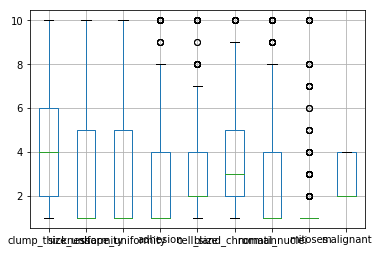

In [0]:
data.boxplot()

Let us make the figure a little wider!

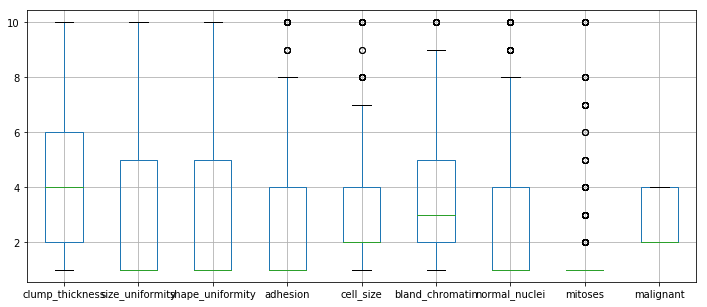

In [0]:
data.boxplot(figsize=(12, 5))

We can choose which columns to plot.

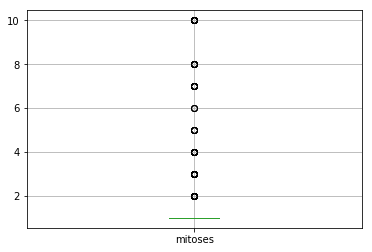

In [0]:
data.boxplot(['mitoses'])

The generic `plot` command works with a `kind` parameter.

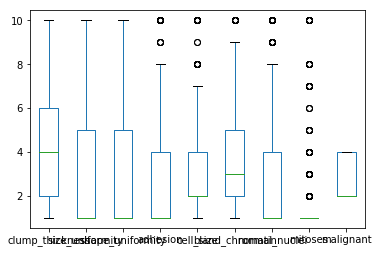

In [0]:
data.plot(kind='box')

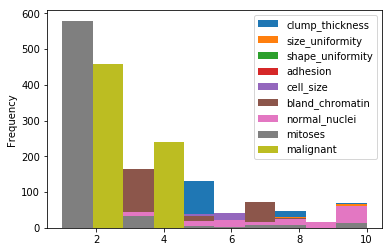

In [0]:
data.plot(kind='hist')

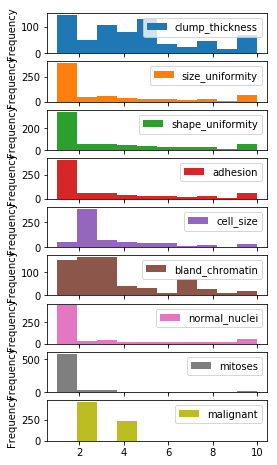

In [0]:
plots = data.plot(kind='hist', subplots=True, figsize=(10/2.54, 20/2.54))

You can select some columns in a `DataFrame`.

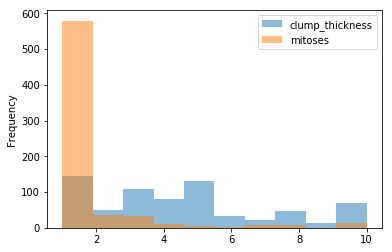

In [0]:
data[['clump_thickness', 'mitoses']].plot(kind='hist', alpha=0.5)

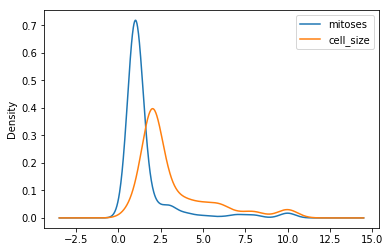

In [0]:
data[['mitoses', 'cell_size']].plot(kind='density')

It is very easy to look for correlations between columns.

In [0]:
data.corr()

,clump_thickness,size_uniformity,shape_uniformity,adhesion,cell_size,bland_chromatin,normal_nuclei,mitoses,malignant
clump_thickness,1.000000,0.644913,0.654589,0.486356,0.521816,0.558428,0.535835,0.350034,0.716001
size_uniformity,0.644913,1.000000,0.906882,0.705582,0.751799,0.755721,0.722865,0.458693,0.817904
shape_uniformity,0.654589,0.906882,1.000000,0.683079,0.719668,0.735948,0.719446,0.438911,0.818934
adhesion,0.486356,0.705582,0.683079,1.000000,0.599599,0.666715,0.603352,0.417633,0.696800
cell_size,0.521816,0.751799,0.719668,0.599599,1.000000,0.616102,0.628881,0.479101,0.682785
bland_chromatin,0.558428,0.755721,0.735948,0.666715,0.616102,1.000000,0.665878,0.344169,0.756616
normal_nuclei,0.535835,0.722865,0.719446,0.603352,0.628881,0.665878,1.000000,0.428336,0.712244
mitoses,0.350034,0.458693,0.438911,0.417633,0.479101,0.344169,0.428336,1.000000,0.423170
malignant,0.716001,0.817904,0.818934,0.696800,0.682785,0.756616,0.712244,0.423170,1.000000


In [0]:
data.corr('spearman')

,clump_thickness,size_uniformity,shape_uniformity,adhesion,cell_size,bland_chromatin,normal_nuclei,mitoses,malignant
clump_thickness,1.000000,0.666463,0.664121,0.541593,0.583979,0.538093,0.570398,0.418717,0.682452
size_uniformity,0.666463,1.000000,0.891904,0.742517,0.787159,0.719330,0.757199,0.508780,0.855487
shape_uniformity,0.664121,0.891904,1.000000,0.711730,0.759234,0.692316,0.725268,0.472749,0.836394
adhesion,0.541593,0.742517,0.711730,1.000000,0.667809,0.624515,0.634310,0.446992,0.727995
cell_size,0.583979,0.787159,0.759234,0.667809,1.000000,0.639507,0.705997,0.480255,0.762731
bland_chromatin,0.538093,0.719330,0.692316,0.624515,0.639507,1.000000,0.662309,0.386944,0.740350
normal_nuclei,0.570398,0.757199,0.725268,0.634310,0.705997,0.662309,1.000000,0.504140,0.743823
mitoses,0.418717,0.508780,0.472749,0.446992,0.480255,0.386944,0.504140,1.000000,0.526766
malignant,0.682452,0.855487,0.836394,0.727995,0.762731,0.740350,0.743823,0.526766,1.000000


In [0]:
data.corr('kendall')

,clump_thickness,size_uniformity,shape_uniformity,adhesion,cell_size,bland_chromatin,normal_nuclei,mitoses,malignant
clump_thickness,1.000000,0.536527,0.534168,0.433447,0.470035,0.417864,0.462330,0.353145,0.593306
size_uniformity,0.536527,1.000000,0.814805,0.639617,0.681967,0.599490,0.663477,0.455333,0.778374
shape_uniformity,0.534168,0.814805,1.000000,0.605153,0.650150,0.571532,0.628145,0.418632,0.753993
adhesion,0.433447,0.639617,0.605153,1.000000,0.570872,0.511487,0.547012,0.400285,0.667469
cell_size,0.470035,0.681967,0.650150,0.570872,1.000000,0.522013,0.608636,0.431205,0.695242
bland_chromatin,0.417864,0.599490,0.571532,0.511487,0.522013,1.000000,0.561403,0.333247,0.654153
normal_nuclei,0.462330,0.663477,0.628145,0.547012,0.608636,0.561403,1.000000,0.453633,0.688275
mitoses,0.353145,0.455333,0.418632,0.400285,0.431205,0.333247,0.453633,1.000000,0.508987
malignant,0.593306,0.778374,0.753993,0.667469,0.695242,0.654153,0.688275,0.508987,1.000000


The two classes malignant and benign were assigned 4 and 2. We can switch them to 1 and 0.

In [0]:
data['malignant'] = (data['malignant'] == 4)
data.head()

,clump_thickness,size_uniformity,shape_uniformity,adhesion,cell_size,bare_nuclei,bland_chromatin,normal_nuclei,mitoses,malignant
sample,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,False
1002945,5,4,4,5,7,10,3,2,1,False
1015425,3,1,1,1,2,2,3,1,1,False
1016277,6,8,8,1,3,4,3,7,1,False
1017023,4,1,1,3,2,1,3,1,1,False


In [0]:
data.tail()

,clump_thickness,size_uniformity,shape_uniformity,adhesion,cell_size,bare_nuclei,bland_chromatin,normal_nuclei,mitoses,malignant
sample,,,,,,,,,,
776715,3,1,1,1,3,2,1,1,1,0
841769,2,1,1,1,2,1,1,1,1,0
888820,5,10,10,3,7,3,8,10,2,1
897471,4,8,6,4,3,4,10,6,1,1
897471,4,8,8,5,4,5,10,4,1,1


Booleans are not good for math. Turn them into numbers.

In [0]:
data['malignant'] = data['malignant'].astype(int)
data.head()

,clump_thickness,size_uniformity,shape_uniformity,adhesion,cell_size,bare_nuclei,bland_chromatin,normal_nuclei,mitoses,malignant
sample,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,0
1002945,5,4,4,5,7,10,3,2,1,0
1015425,3,1,1,1,2,2,3,1,1,0
1016277,6,8,8,1,3,4,3,7,1,0
1017023,4,1,1,3,2,1,3,1,1,0


Statsmodels tries to support R-like formulas.

In [0]:
formula = 'malignant ~ clump_thickness + size_uniformity + shape_uniformity + adhesion + cell_size + bland_chromatin + normal_nuclei + mitoses'

In [0]:
model = smf.logit(formula, data=data)

In [0]:
fit = model.fit() 

Optimization terminated successfully.
         Current function value: 0.100619
         Iterations 9


In [0]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              malignant   No. Observations:                  699
Model:                          Logit   Df Residuals:                      690
Method:                           MLE   Df Model:                            8
Date:                Mon, 24 Jun 2019   Pseudo R-squ.:                  0.8438
Time:                        04:52:58   Log-Likelihood:                -70.333
converged:                       True   LL-Null:                       -450.26
                                        LLR p-value:                9.174e-159
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -9.9456      1.032     -9.634      0.000     -11.969      -7.922
clump_thickness      0.5776      0.119      4.852      0.000       0.344       0.811
size_uniformity     -0.0116      0.176     -0.066      0.948      -0.356       0.333
shape_uniformity     0.5679      0.191      2.969      0.003       0.193       0.943
adhesion             0.3137      0.100      3.125      0.002       0.117       0.510
cell_size            0.1306      0.141      0.929      0.353      -0.145       0.406
bland_chromatin      0.5800      0.146      3.984      0.000       0.295       0.865
normal_nuclei        0.1232      0.099      1.248      0.212      -0.070       0.317
mitoses              0.6079      0.324      1.875      0.061      -0.027       1.243
====================================================================================
"""

That is good for statistics. We want to make predictions using our model.

# Enter AI.

In [0]:
import sklearn.linear_model as sklm

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = data.drop(columns='malignant')
y = data['malignant']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [0]:
model = sklm.LogisticRegression()

In [0]:
fit = model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: ignored

# Pause here: What is this telling us?
  - Remember missing values?
  - So far the libraries have been too friendly and let us shoot ourselves in the foot!

We can go back and reload the data - uncomment the commented line.

Or just replace the `?` entries with a missing value representative.

In [0]:
data2 = data.replace('?', np.nan)

In [0]:
data2.head()

,clump_thickness,size_uniformity,shape_uniformity,adhesion,cell_size,bare_nuclei,bland_chromatin,normal_nuclei,mitoses,malignant
sample,,,,,,,,,,
1000025,5,1,1,1,2,1,3,1,1,0
1002945,5,4,4,5,7,10,3,2,1,0
1015425,3,1,1,1,2,2,3,1,1,0
1016277,6,8,8,1,3,4,3,7,1,0
1017023,4,1,1,3,2,1,3,1,1,0


`DataFrame.isnull()` and `DataFrame.isna()` functions are there to check for missing values.

In [0]:
data2.isnull()

,clump_thickness,size_uniformity,shape_uniformity,adhesion,cell_size,bare_nuclei,bland_chromatin,normal_nuclei,mitoses,malignant
sample,,,,,,,,,,
1000025,False,False,False,False,False,False,False,False,False,False
1002945,False,False,False,False,False,False,False,False,False,False
1015425,False,False,False,False,False,False,False,False,False,False
1016277,False,False,False,False,False,False,False,False,False,False
1017023,False,False,False,False,False,False,False,False,False,False
1017122,False,False,False,False,False,False,False,False,False,False
1018099,False,False,False,False,False,False,False,False,False,False
1018561,False,False,False,False,False,False,False,False,False,False
1033078,False,False,False,False,False,False,False,False,False,False


## Drop the rows with missing data

In [0]:
data3 = data2.dropna(axis=0)

In [0]:
len(data3)

683

In [0]:
X = data3.drop(columns='malignant')
y = data3['malignant']

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [0]:
sk_model = sklm.LogisticRegression(fit_intercept=True)

In [0]:
sk_fit = model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [0]:
sk_pred = fit.predict(X_test)

In [0]:
sk_pred[:10]

sample
1240603    0.001533
667204     0.999784
1295529    0.949707
1182404    0.005461
1183911    0.001747
1180194    0.997140
1105257    0.797690
1304595    0.004862
1116116    0.994251
1070935    0.003049
dtype: float64

In [0]:
y_test[:10]

sample
1240603    0
667204     1
1295529    1
1182404    0
1183911    0
1180194    1
1105257    1
1304595    0
1116116    1
1070935    0
Name: malignant, dtype: int64

In [0]:
sk_fit.score(X_test, y_test)

0.9707602339181286

In [0]:
len(sk_pred[sk_pred == y_test])

0

In [0]:
len(sk_pred)

171

In [0]:
len(y_test) 

171

In [0]:
len(y_test[y_test==0])

111

In [0]:
len(sk_pred[sk_pred == 0])

0

In [0]:
len(sk_pred[sk_pred==1])

58

In [0]:
np.where(sk_pred != y_test)

(array([  7,  41,  62, 110, 114, 121, 141]),)

In [0]:
sk_fit.coef_

array([[ 0.25828932,  0.2532876 ,  0.43079709,  0.07365567, -0.11615986,
         0.30221469,  0.1002709 ,  0.22268638,  0.13021731]])

In [0]:
len(np.flatnonzero(sk_pred == y_test.values))*1.0 / len(y_test)

0.9590643274853801

In [0]:
np.where(sk_pred == y_test)

(array([  0,   1,   2,   3,   4,   5,   6,   8,   9,  10,  11,  12,  13,
         14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
         27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
         40,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,
         54,  55,  56,  57,  58,  59,  60,  61,  63,  64,  65,  66,  67,
         68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,
         81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,
         94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106,
        107, 108, 109, 111, 112, 113, 115, 116, 117, 118, 119, 120, 122,
        123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135,
        136, 137, 138, 139, 140, 142, 143, 144, 145, 146, 147, 148, 149,
        150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162,
        163, 164, 165, 166, 167, 168, 169, 170]),)

# Parting notes
- Code is read more often than it is written. 
  - Your clever writing will be unintelligible to your audience (including you at a later date). 
  - **Keep your reader in mind.**
 > "Debugging is twice as hard as writing the code in the first place. Therefore, if you write the code as cleverly as possible, you are, by definition, not smart enough to debug it."
>
>        — Brian W. Kernighan and P. J. Plauger in The Elements of Programming Style.
